# Hierarchical Clustering Analysis
This script performs hierarchical clustering on Harmful Algal Bloom (HAB) data loaded from an Excel file, using Euclidean distance and Ward linkage. The analysis includes data preprocessing, clustering, visualization, and results interpretation.

## 1. Import Necessary Libraries
First, import all necessary libraries for data manipulation, clustering analysis, and visualization.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster
from scipy.spatial.distance import pdist, squareform
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')

## 2. Data Loading and Preparation
This function loads the HAB data from an Excel file and prepares it for clustering analysis.

In [3]:
def load_and_prepare_data():
    # Reads the HAB dataset from an Excel file named `Dataset_complete.xlsx`.
    df = pd.read_excel("Dataset_complete.xlsx")
    return df

## 3. Main Clustering Analysis Function
This is the core function that performs the complete hierarchical clustering analysis workflow.

In [5]:
def perform_clustering_analysis(user_n_clusters=4):
    
    # 3.1 Data Loading and Feature Selection
    # Load the dataset and display basic information. Then, select only the numerical features for clustering analysis, excluding categorical variables like Time and Lake identifiers.
    df = load_and_prepare_data()
    print(f"Dataset shape: {df.shape}")
    print("\nFirst few rows:")
    print(df.head())

    # Select numerical columns for clustering
    numerical_cols = ['Solar Rad', 'Air Temp', 'Precpt', 'Wind Speed', 'Water Temp', 
                     'Turbidity', 'DO', 'TN', 'TP', 'Chl-a', 'CyanHAB']
    
    # Prepare time series data
    time_series_data = df[numerical_cols].values

    
    # 3.2 Data Normalization
    # Standardize the data to ensure all variables contribute equally to the clustering analysis, regardless of their original scales.
    scaler = StandardScaler()
    normalized_data = scaler.fit_transform(time_series_data) 

    
    # 3.3 Distance Matrix Computation
    # Calculate the Euclidean distance matrix between all pairs of samples.
    print("Computing Euclidean distance matrix...")
    euclidean_distances = pdist(normalized_data, metric='euclidean')
    euclidean_matrix = squareform(euclidean_distances)  # for silhouette_score


    # 3.4 Hierarchical Clustering
    # Perform hierarchical clustering using Ward linkage method, which minimizes within-cluster variance.
    linkage_matrix = linkage(euclidean_distances, method='ward')


    # 3.5 Dendrogram Visualization
    # Create and save a dendrogram to visualize the hierarchical clustering structure.
    plt.figure(figsize=(12, 8))
    dendrogram(linkage_matrix, 
               labels=df['Lake'].values if 'Lake' in df.columns else None,
               leaf_rotation=45,
               leaf_font_size=4)
    plt.title('Hierarchical Clustering Dendrogram', fontsize=14)
    plt.xlabel('Lake Names', fontsize=10)
    plt.ylabel('Euclidean Distance', fontsize=10)
    plt.tight_layout()
    plt.savefig('euclidean_dendrogram.png', dpi=300, bbox_inches='tight')
    plt.show()


    # 3.6 Cluster Assignment and Validation
    # Assign samples to clusters based on the user-specified number of clusters and calculate the silhouette score for validation.
    # If user want to define the number of cluster Use this code
    n_clusters = user_n_clusters
    print(f"\nUsing user-defined number of clusters: {n_clusters}")
    
    # Get cluster assignments
    cluster_labels = fcluster(linkage_matrix, n_clusters, criterion='maxclust')
    df['Cluster'] = cluster_labels

    # Calculate silhouette score for information
    silhouette_avg = silhouette_score(euclidean_matrix, cluster_labels, metric='precomputed')
    print(f"Silhouette Score for {n_clusters} clusters: {silhouette_avg:.3f}")

    
    # 3.7 Results Export
    # Save all results to an Excel file with multiple sheets for easy analysis and sharing.
    print("\nSaving results to Excel...")
    with pd.ExcelWriter('clustering_results.xlsx', engine='openpyxl') as writer:
        # Original data with cluster labels
        df.to_excel(writer, sheet_name='Clustered_Data', index=False)
        
        # Distance matrix
        distance_df = pd.DataFrame(euclidean_matrix, 
                                 index=df['Lake'] if 'Lake' in df.columns else df.index, 
                                 columns=df['Lake'] if 'Lake' in df.columns else df.index)
        distance_df.to_excel(writer, sheet_name='Euclidean_Distance_Matrix')
    
    print("Results saved to 'clustering_results.xlsx'")
    
    return df, euclidean_matrix, linkage_matrix, cluster_labels    

## 4. Script Execution Block
If the script is run directly, it will execute the clustering analysis with `user_n_clusters = 4`. Users can modify `user_n_clusters` to experiment with different numbers of clusters.

Dataset shape: (1086, 13)

First few rows:
        Time  Solar Rad   Air Temp  Precpt  Wind Speed  Water Temp  Turbidity  \
0 2016-05-01      552.0  13.098118  38.608        2.29   13.020000   4.000000   
1 2016-06-01      616.0  18.188889  84.328        2.46   17.395000   4.400000   
2 2016-07-01      591.0  21.352151  88.138        2.12   21.713000   6.901313   
3 2016-08-01      515.0  21.752688  75.692        2.15   23.345000   4.500000   
4 2016-09-01      472.0  17.248611  43.942        2.16   20.028333   3.900000   

         DO        TN        TP      Chl-a        CyanHAB       Lake  
0  7.846351  0.456619  0.015720   5.841333     714.141692  Champlain  
1  7.813674  0.415467  0.019025   6.337768     170.328006  Champlain  
2  7.151752  0.338750  0.020302   4.573067     162.109448  Champlain  
3  5.942857  0.366250  0.023245   5.280500   31249.203375  Champlain  
4  5.185714  0.455800  0.029092  12.021167  105429.152904  Champlain  
Computing Euclidean distance matrix...


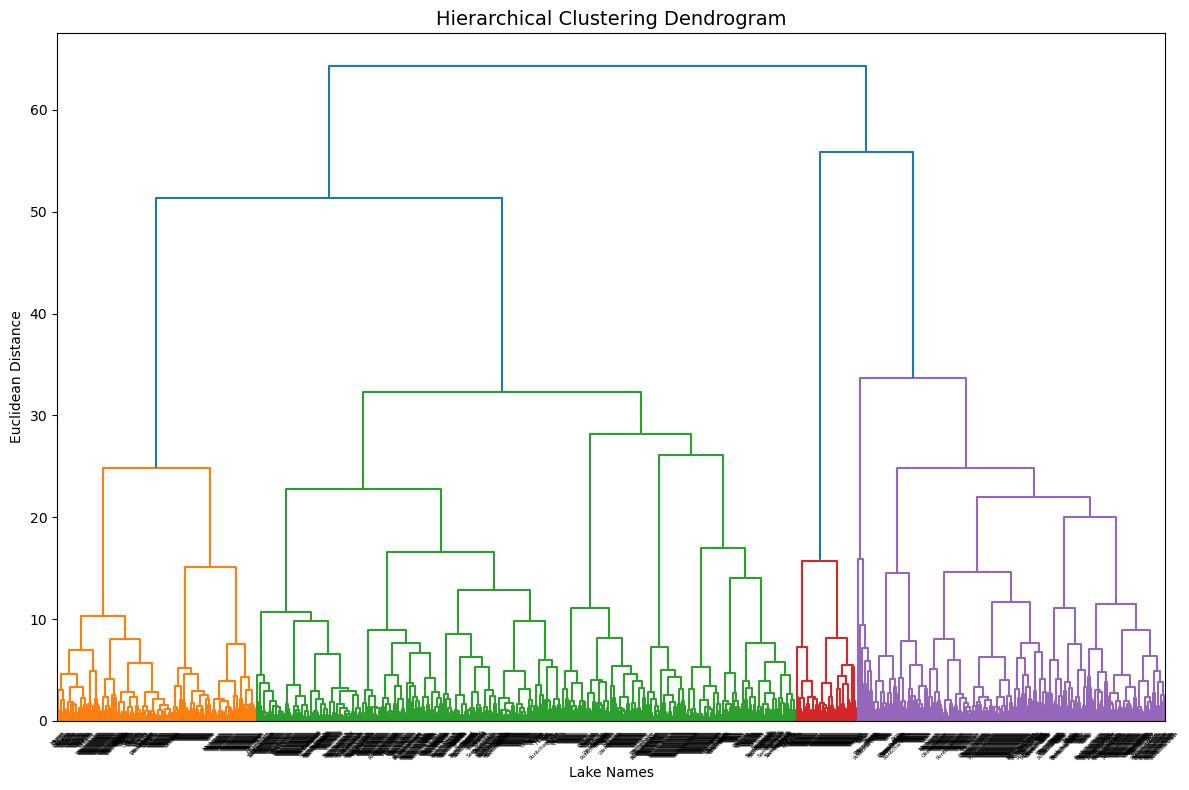


Using user-defined number of clusters: 4
Silhouette Score for 4 clusters: 0.199

Saving results to Excel...
Results saved to 'clustering_results.xlsx'


In [7]:
# Example usage:
if __name__ == "__main__":
    # You can change this value to any number of clusters you want
    user_n_clusters = 4
    results = perform_clustering_analysis(user_n_clusters)